In [1]:
#%matplotlib notebook
import os, time, sys
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import panda2.analysis.interpreter as interpreter
import panda2.analysis.event_builder as event_builder
import panda2.analysis.fitfunctions as fitfunc

# if False:
!ping -c 1 192.168.10.17
if True:
    import panda2.panda2 as panda2
    dut = panda2.Panda2()
    dut.init()
    en_comp = np.copy(dut.PixelConf['en_comp'])
    tdac = np.copy(dut.PixelConf['tdac'])
    dut.set_conf(INFB=63, INFB2=63)

PING 192.168.10.17 (192.168.10.17) 56(84) bytes of data.
64 bytes from 192.168.10.17: icmp_seq=1 ttl=64 time=0.077 ms

--- 192.168.10.17 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 0ms
rtt min/avg/max/mdev = 0.077/0.077/0.077/0.000 ms


2023-06-06 19:17:36,991 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing spi_inj (firmware version: 2), module basil.HL.spi, base_addr 0x10
2023-06-06 19:17:36,992 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing inj (firmware version: 1), module panda2.pulse_gen_div, base_addr 0x100
2023-06-06 19:17:36,992 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing sync (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x140
2023-06-06 19:17:36,992 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing gate (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x180
2023-06-06 19:17:36,993 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing ts_inj (firmware version: 1), module panda2.timestamp_div, base_addr 0x1c0
2023-06-06 19:17:36,993 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing gpio (firmware version: 0), module basil.HL.gpio, base_addr 0x200
20

In [16]:
### configure chip and enable rx
col, row = 0, 0
en_comp2 = np.copy(en_comp)
en_comp[:] = 0
en_comp[col, row] = 0
dut.set_en_comp(en_comp)
#dut.set_en_comp('all')
dut.set_en_hitbus([col])
#dut.set_en_hitbus('all')
dut.set_en_ampout([col])
dut.set_en_inj([col, row])
dut.set_rx(False)
dut.set_tdac(7)
tdac = np.copy(dut.PixelConf['tdac'])

dut.set_conf(VDACVTh=200, VDACVBL=0, INFB2=63, VDACTh2=110)  ## set lowest (largest in number) threshold
dut.set_inj(inj_n=1, ext=True)
dut.set_sync(auto_sync=True)
dut.set_inj_amp(0.1, 'V')

dut.set_ts_inj(True)
dut.set_rx(True)
dut.mask_rx(True)
dut.inject()

2023-06-06 19:27:35,273 - root - [INFO    ] (MainThread) _write_conf row0 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2023-06-06 19:27:35,274 - root - [INFO    ] (MainThread) set_inj: inj_width=10240 inj_delay=10240 inj_phase=-1 inj_n=1 ext=1
2023-06-06 19:27:35,277 - root - [INFO    ] (MainThread) set_en_hitbus: en_hitbus_col=0x1ffffffe
2023-06-06 19:27:35,280 - root - [INFO    ] (MainThread) set_en_ampout: en_ampout_col=0x00000001
2023-06-06 19:27:35,283 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_10000
2023-06-06 19:27:35,286 - root - [INFO    ] (MainThread) set_conf:VDACVTh=200VDACVBL=0INFB2=63VDACTh2=110
2023-06-06 19:27:35,390 - root - [INFO    ] (MainThread) set_sy

In [20]:
import importlib
importlib.reload(interpreter)

dut.set_conf(VDACVth=80, VDACBL=110)
dut.set_inj(inj_n=100, ext=True)
dut.inject()
hit, ts =interpreter.raw2list(dut.get_data(timeout=3))
len(hit), len(ts)

2023-06-06 18:38:46,902 - root - [INFO    ] (MainThread) set_inj: inj_width=10240 inj_delay=10240 inj_phase=-1 inj_n=100 ext=1
2023-06-06 18:38:46,902 - root - [INFO    ] (MainThread) set_conf:VDACVth=80VDACBL=110
2023-06-06 18:38:46,976 - root - [WARNING ] (MainThread) get_data: error status=0x0 fifo_size=0 loop=3 ts=300/300


(249072, 100)

In [7]:
en_comp2[:]=0
en_comp2[col,row]=1
en_comp[:]=0
dut.set_conf(VDACVTh=110, VDACVBL=90, INFB2=63, VDACTh2=100)
dut._write_conf(en_comp=en_comp, tdac=tdac, tdac2=tdac, en_comp2=en_comp)

2023-06-06 19:21:03,951 - root - [INFO    ] (MainThread) set_inj: inj_width=10240 inj_delay=10240 inj_phase=-1 inj_n=0 ext=1
2023-06-06 19:21:03,951 - root - [INFO    ] (MainThread) set_conf:VDACVTh=110VDACVBL=90INFB2=63VDACTh2=100
2023-06-06 19:21:03,958 - root - [INFO    ] (MainThread) _write_conf row0 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [56]:
### scan tdac
dut.set_rx(True)
dut.mask_rx(True)
cols = range(dut.ncols)
rows = range(dut.nrows)
tdacs = [None] #[7,6,5,4,3,2,1,0]
injs = [0.20] #np.arange(0.020, 0.200, 0.002)
inj_unit = 'V'
fast_scan = False  # Ture: break cnt == inj 


fname = panda2.mk_fname('inj_scan.npy')
with open(fname, 'wb') as f:
    pass
tdac = np.copy(dut.PixelConf['tdac'])
dut.set_inj_amp(injs[0], inj_unit)
dut.set_en_hitbus('none')
dat = np.empty(10000, dtype=[('col','u1'),('row','u1'),('tdac','u1'),('inj','f4'),('cnt','u1')])
print('col-row-tdac-inj-cnt-allcnt------------', col)
for col in cols:
    raw = []
    ev = []
    i = 0
    for row in rows:
        dut.set_en_inj(pix=[col, row])
        en_comp[:]=0
        en_comp[col,row] = 1
        dut.set_en_comp(en_comp)
        t_org = tdac[col, row]
        for t in tdacs:
            t_org = tdac[col, row]
            if t is not None:
                tdac[col,row] = t
                dut.set_tdac(tdac)
            flg = 0
            for inj in injs:
                if inj is not None:
                    dut.set_inj_amp(inj, inj_unit)
                raw.append(dut.get_data(timeout=5))
                hit, ts = interpreter.raw2list(raw[-1])
                ev.append(event_builder.hit2ev(hit, ts))
                len_hit = np.bitwise_and(ev[-1]['col']==col, ev[-1]['row']==row*2).sum()
                dat[i]['col'] = col
                dat[i]['row'] = row
                dat[i]['inj'] = inj
                dat[i]['tdac'] = tdac[col,row]
                dat[i]['cnt'] = len_hit
                i = i+1
                print(col, row, inj, t, len_hit, len(hit),'flg={}'.format(flg))
                if len_hit > 0:
                    if inj==0.0:
                        print('data at 0inj',ev[-1])
                        flg = -1
                        break
                    elif len_hit > len(ts):
                        break
                    elif flg > 5 and fast_scan==True:
                        break
                    elif len_hit == len(ts):
                        flg = flg+1
                elif len(hit) > 100+len(ts):
                    print('too much data', len(hit))
                    flg = -1
                    break
            if flg==-1:
                break
        tdac[col, row] = t_org #max(t_set, 0)
    with open(fname, 'ab+') as f:
        np.save(f, {'raw': raw, 'ev': ev, 'dat':dat[:i]})
dat = dat[:i]
with open(fname, 'ab+') as f:
        np.save(f, dut.get_configuration())

2023-06-06 18:47:28,454 - root - [INFO    ] (MainThread) set_rx: FIFO is not empty(768), try to discard the data...
2023-06-06 18:47:28,586 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:28,592 - root - [INFO    ] (MainThread) set_inj: inj_width=10240 inj_delay=10240 inj_phase=-1 inj_n=1 ext=1
2023-06-06 18:47:28,593 - root - [INFO    ] (MainThread) set_en_hitbus: en_hitbus_col=0x1fffffff
2023-06-06 18:47:28,602 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_10000
2023-06-06 18:47:28,603 - root - [INFO    ] (MainThread) inj_amp: 1176


col-row-tdac-inj-cnt-allcnt------------ 14


2023-06-06 18:47:28,870 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00100
2023-06-06 18:47:28,871 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:28,997 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00001
2023-06-06 18:47:28,998 - root - [INFO    ] (MainThread) inj_amp: 1176


0 0 0.2 None 0 13213 flg=0
too much data 13213
0 1 0.2 None 0 4935 flg=0
too much data 4935


2023-06-06 18:47:29,186 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00010 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:29,188 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:29,337 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_01000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:29,338 - root - [INFO    ] (MainThread) inj_amp: 1176


0 2 0.2 None 0 8263 flg=0
too much data 8263
0 3 0.2 None 0 6709 flg=0
too much data 6709


2023-06-06 18:47:29,535 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_10000_00000
2023-06-06 18:47:29,537 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:29,663 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00100_00000
2023-06-06 18:47:29,664 - root - [INFO    ] (MainThread) inj_amp: 1176


0 4 0.2 None 0 8364 flg=0
too much data 8364
0 5 0.2 None 0 5749 flg=0
too much data 5749


2023-06-06 18:47:29,858 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00001_00000
2023-06-06 18:47:29,859 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:30,020 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00010_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:30,022 - root - [INFO    ] (MainThread) inj_amp: 1176


0 6 0.2 None 0 9191 flg=0
too much data 9191
0 7 0.2 None 0 6668 flg=0
too much data 6668


2023-06-06 18:47:30,179 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_01000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:30,181 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:30,342 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_10000_00000_00000
2023-06-06 18:47:30,344 - root - [INFO    ] (MainThread) inj_amp: 1176


0 8 0.2 None 0 6673 flg=0
too much data 6673
0 9 0.2 None 0 7420 flg=0
too much data 7420


2023-06-06 18:47:30,526 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00100_00000_00000
2023-06-06 18:47:30,528 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:30,686 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00001_00000_00000
2023-06-06 18:47:30,687 - root - [INFO    ] (MainThread) inj_amp: 1176


0 10 0.2 None 0 8225 flg=0
too much data 8225
0 11 0.2 None 0 6623 flg=0
too much data 6623


2023-06-06 18:47:30,862 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00010_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:30,863 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:31,026 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_01000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:31,027 - root - [INFO    ] (MainThread) inj_amp: 1176


0 12 0.2 None 0 7503 flg=0
too much data 7503
0 13 0.2 None 0 6638 flg=0
too much data 6638


2023-06-06 18:47:31,200 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_10000_00000_00000_00000
2023-06-06 18:47:31,202 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:31,342 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00100_00000_00000_00000
2023-06-06 18:47:31,344 - root - [INFO    ] (MainThread) inj_amp: 1176


0 14 0.2 None 0 7499 flg=0
too much data 7499
0 15 0.2 None 0 6642 flg=0
too much data 6642


2023-06-06 18:47:31,549 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00001_00000_00000_00000
2023-06-06 18:47:31,550 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:31,700 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00010_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:31,701 - root - [INFO    ] (MainThread) inj_amp: 1176


0 16 0.2 None 0 9090 flg=0
too much data 9090
0 17 0.2 None 0 5804 flg=0
too much data 5804


2023-06-06 18:47:31,842 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_01000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:31,844 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:32,032 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_10000_00000_00000_00000_00000
2023-06-06 18:47:32,033 - root - [INFO    ] (MainThread) inj_amp: 1176


0 18 0.2 None 0 6617 flg=0
too much data 6617
0 19 0.2 None 0 9013 flg=0
too much data 9013


2023-06-06 18:47:32,196 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00100_00000_00000_00000_00000
2023-06-06 18:47:32,197 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:32,363 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00001_00000_00000_00000_00000
2023-06-06 18:47:32,364 - root - [INFO    ] (MainThread) inj_amp: 1176


0 20 0.2 None 0 7379 flg=0
too much data 7379
0 21 0.2 None 0 7525 flg=0
too much data 7525


2023-06-06 18:47:32,540 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00010_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:32,540 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:32,697 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_01000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:32,698 - root - [INFO    ] (MainThread) inj_amp: 1176


0 22 0.2 None 0 7458 flg=0
too much data 7458
0 23 0.2 None 0 6610 flg=0
too much data 6610


2023-06-06 18:47:32,872 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_10000_00000_00000_00000_00000_00000
2023-06-06 18:47:32,872 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:33,038 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00100_00000_00000_00000_00000_00000
2023-06-06 18:47:33,039 - root - [INFO    ] (MainThread) inj_amp: 1176


0 24 0.2 None 0 7435 flg=0
too much data 7435
0 25 0.2 None 0 7434 flg=0
too much data 7434


2023-06-06 18:47:33,202 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00001_00000_00000_00000_00000_00000
2023-06-06 18:47:33,203 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:33,375 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00010_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:33,376 - root - [INFO    ] (MainThread) inj_amp: 1176


0 26 0.2 None 0 7369 flg=0
too much data 7369
0 27 0.2 None 0 7399 flg=0
too much data 7399


2023-06-06 18:47:33,545 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_01000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:33,546 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:33,695 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_10000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:33,697 - root - [INFO    ] (MainThread) inj_amp: 1176


0 28 0.2 None 0 7484 flg=0
too much data 7484
0 29 0.2 None 0 6599 flg=0
too much data 6599


2023-06-06 18:47:33,869 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00100_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:33,870 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:34,043 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00001_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:34,044 - root - [INFO    ] (MainThread) inj_amp: 1176


0 30 0.2 None 0 8190 flg=0
too much data 8190
0 31 0.2 None 0 8239 flg=0
too much data 8239


2023-06-06 18:47:34,205 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00010_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:34,206 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:34,363 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_01000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:34,364 - root - [INFO    ] (MainThread) inj_amp: 1176


0 32 0.2 None 0 7423 flg=0
too much data 7423
0 33 0.2 None 0 7387 flg=0
too much data 7387


2023-06-06 18:47:34,542 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_10000_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:34,543 - root - [INFO    ] (MainThread) inj_amp: 1176
2023-06-06 18:47:34,703 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00100_00000_00000_00000_00000_00000_00000_00000
2023-06-06 18:47:34,704 - root - [INFO    ] (MainThread) inj_amp: 1176


0 34 0.2 None 0 8247 flg=0
too much data 8247
0 35 0.2 None 0 7412 flg=0
too much data 7412


KeyboardInterrupt: 

In [101]:
#dut.set_inj(inj_n=10, inj_width=10240, inj_delay=10240, inj_phase=-1, ext=True)
#dut.inject()
print('sw',dut['SW'].get_configuration())
print('sync', dut['sync'].get_configuration(),'\n', {'is_ready': dut['sync'].is_ready})
print('inj ', dut['inj'].get_configuration(),'\n', {'is_ready': dut['inj'].is_ready})
print('gate',dut['gate'].get_configuration(),'\n',{'is_ready': dut['gate'].is_ready})
#dut['inj'].EN=1
#dut['inj'].RESET=1


sw {'RstAnalogB': '1', 'EN_CkExt': '1', 'EN_CkRef': '0', 'SEL_GECCO': '0', 'SYNC_RES': '0', 'EN_PULSE_SYNC': '1'}
sync {'EN': 0, 'DELAY': 16777215, 'WIDTH': 1, 'REPEAT': 0} 
 {'is_ready': 0}
inj  {'EN': 1, 'EN_OUT': 63, 'DELAY': 10240, 'WIDTH': 10240, 'REPEAT': 100, 'PHASE_DES': 255, 'DEBUG': 0} 
 {'is_ready': 0}
gate {'EN': 0, 'DELAY': 1, 'WIDTH': 16777216, 'REPEAT': 1} 
 {'is_ready': 1}


In [113]:
uni, idx, cnt = np.unique(dat[['col','row']], return_index=True, return_counts=True)

In [114]:
toa = []
toa_ave = []
toa_std = []
for u_i, u in enumerate(uni):
    for e in ev[dat=u]:
        tmp = e[np.bitwise_and(e['col']==u['col'],
                               e['row']==u['row']*2)]
        toa.append(np.bincount(tmp['toa'], minlength=100)[:100])
        toa_ave.append(np.average(tmp['toa']))
        toa_std.append(np.std(tmp['toa']))
toa=np.transpose(np.array(toa))
toa_ave = np.array(toa_ave)
toa_std = np.array(toa_std)

toa = toa * 5.0  ## clk to ns
x = dat['inj'][:len(ev)]

plt.plot(x, dat['cnt'][:len(ev)], '.')
a,b,c,ae,be,ce = fitfunc.fit_scurve(x, dat['cnt'][:len(ev)],reverse=False)
plt.plot(x, fitfunc.scurve(x,a,b,c), '-')
print('th={0:.2f}mV sigma={1:.2f}mV'.format(b*1E3,c*1E3))
print('th={0:.2f}e sigma={1:.2f}e'.format(b*1E3*1620/37.,c*1E3*1620/37.))

TypeError: only integer scalar arrays can be converted to a scalar index

Text(0, 0.5, 'ToA [ns]')

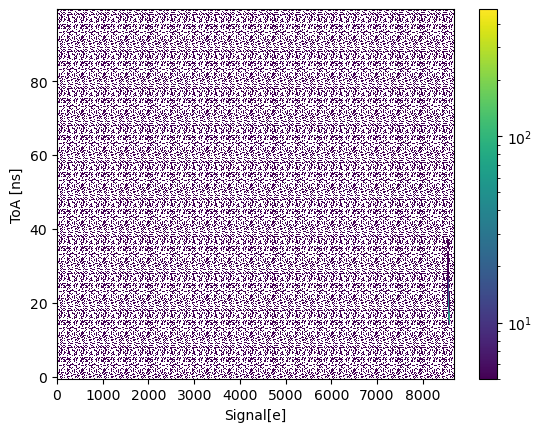

In [107]:
from matplotlib.colors import LogNorm

plt.imshow(toa, origin='lower', norm=LogNorm(), aspect='auto',
          #extent=[np.min(x), np.max(x), 0, len(toa[:,0])]
          )
plt.colorbar()
plt.xlabel('Signal[e]')
plt.ylabel('ToA [ns]')

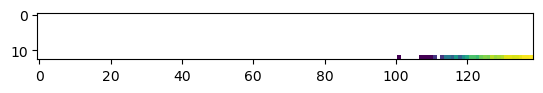

In [78]:
plt.imshow(toa[:13,:], norm=LogNorm())

In [53]:
### Load data
#fname = os.path.join(outdir,'VDACVth{0:d}IPDAC{1:d}VNComp{2:d}.npy'.format(
#        dut['CONF']['VDACVth'].tovalue(),
#        dut['CONF']['IPDAC'].tovalue(),
#        dut['CONF']['VNComp'].tovalue(),
#        ))
#fname = '/home/thirono/Documents/data/2023-04-25/panda2_th/Chip1VDACVth90IPDAC2VNComp10.npy'
with open(fname, 'rb') as f:
    with open(fname, 'rb') as f:
        dat = np.load(f, allow_pickle=True).item()['dat'][1:]
        while True:
            try:
                dat=np.append(dat,np.load(f, allow_pickle=True).item()['dat'])
            except:
                break
os.path.basename(fname), len(dat)

('20230605_120349_inj_scan.npy', 80)

In [54]:
for e in ev[1:]:
    tmp = e[np.bitwise_and(e['col']==col,
                           e['row']==row)]
    toa.append(np.bincount(tmp['toa'], minlength=100)[:100])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [83]:
(100/0.3)**2/370

300.30030030030036

In [85]:
np.sqrt(370*120)*0.3

63.21392251711643

In [86]:
63*80

5040

In [9]:
import numpy as np
0.3 * np.sqrt(370*200)

81.60882305241266